In [2]:
# import statements for animating voxel plots for 3D drone environment.
import random
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D

In [3]:
# building a baseline 3x3x3 drone environment world,
# where are numbers have usual meaning & '5' is added additionally
# these are additional stationary carrier platforms in the environment..
world_def = np.array([[[1, 3, 0],
                      [0, 0, 0],
                      [0, 0, 4]],
                     [[0, 0, 0],
                      [5, 0, 5],
                      [0, 0, 0]],
                     [[0, 0, 0],
                      [0, 0, 2],
                      [0, 0, 0]]])
print(world_def.shape)

(3, 3, 3)


In [4]:
# generating some sample 3D environment observations randomly.
env_observation_samples = []
for i in range(100):
    prob = random.uniform(0, 1)
    world_two = np.rot90(world_def)
    world_three = np.rot90(world_two)
    world_four = np.rot90(world_three)
    if prob > 0 and prob <= 0.25:
        env_observation_samples.append(world_two)
    elif prob > 0.5 and prob <= 0.75:
        env_observation_samples.append(world_three)
    elif prob > 0.75 and prob <= 1:
        env_observation_samples.append(world_four)
    else:
        env_observation_samples.append(world_def)

In [5]:
# outputting complete observation grid of the 3D environment.
env_observation_samples[3]

array([[[1, 3, 0],
        [0, 0, 0],
        [0, 0, 4]],

       [[0, 0, 0],
        [5, 0, 5],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 2],
        [0, 0, 0]]])

In [6]:
# transforming observation samples into corresponding hex-values for voxel plots.
def transform_observations(env_observation_samples):
    color_dict = {
        '0' : '#F0F8FF55',    # aliceblue
        '1' : '#BCEE6855',    # darkolivegreen2
        '2' : '#6E8B3D66',    # darkolivegreen4
        '3' : '#FFD39B55',    # burlywood1
        '4' : '#FF6A6A55',    # indianred1
        '5' : '#838B8377',    # honeydew4
    }
    hex_env_renders = []
    for env_render_ in env_observation_samples:
        colors = env_render_
        colors = colors.astype(str)
        colors[colors == '0'] = color_dict['0']
        colors[colors == '1'] = color_dict['1']
        colors[colors == '2'] = color_dict['2']
        colors[colors == '3'] = color_dict['3']
        colors[colors == '4'] = color_dict['4']
        colors[colors == '5'] = color_dict['5']
        hex_env_renders.append(colors)
    return hex_env_renders
new_env_observation_samples = transform_observations(env_observation_samples)

In [7]:
# transformation comparison for observation samples.
print(env_observation_samples[0])
print('\n')
print(new_env_observation_samples[0])

[[[0 0 0]
  [0 0 0]
  [1 3 0]]

 [[0 0 2]
  [5 0 5]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 4]]]


[[['#F0F8FF55' '#F0F8FF55' '#F0F8FF55']
  ['#F0F8FF55' '#F0F8FF55' '#F0F8FF55']
  ['#BCEE6855' '#FFD39B55' '#F0F8FF55']]

 [['#F0F8FF55' '#F0F8FF55' '#6E8B3D66']
  ['#838B8377' '#F0F8FF55' '#838B8377']
  ['#F0F8FF55' '#F0F8FF55' '#F0F8FF55']]

 [['#F0F8FF55' '#F0F8FF55' '#F0F8FF55']
  ['#F0F8FF55' '#F0F8FF55' '#F0F8FF55']
  ['#F0F8FF55' '#F0F8FF55' '#FF6A6A55']]]


In [9]:
# agent_rendering function containing three utility functions for making 3D grid,
# expanding voxels and animation callback function for generating
# rendered output in '.mp4' output file.
def agent_rendering(obs_list):
    fps = 5
    nSeconds = 20
    snapshots = obs_list

    def make_ax(grid=False):
        fig = plt.figure(figsize=(5,5) )
        ax = fig.gca(projection='3d')
        ax.set_xlabel("x")
        ax.set_ylabel("y")
        ax.set_zlabel("z")
        ax.grid(grid)
        return ax, fig

    ax,fig = make_ax(True)
    colors = snapshots[0]

    def explode(data):
        shape_arr = np.array(data.shape)
        size = shape_arr[:3]*2 - 1
        exploded = np.zeros(np.concatenate([size, shape_arr[3:]]), dtype=data.dtype)
        exploded[::2, ::2, ::2] = data
        return exploded

    filled = explode(np.ones((3, 3, 3)))
    colors = explode(colors)
    ax.voxels(filled, edgecolors='#5F9EA055', facecolors=colors, shade=False) # cadetblue: '#5F9EA077'
    im = plt.show()

    def animate_func(i):
        if i % fps == 0:
            print( '.', end ='' )
        ax.voxels(filled, edgecolors='#5F9EA055', facecolors=explode(snapshots[i]), shade=False) # cadetblue: '#5F9EA077'
        plt.show()
        return []

    anim = animation.FuncAnimation(
                                   fig, 
                                   animate_func, 
                                   frames = nSeconds * fps,
                                   interval = 1000 / fps, # in ms
                                   )
    anim.save('test_anim.mp4', fps=fps, extra_args=['-vcodec', 'libx264'])
    print('Done!')

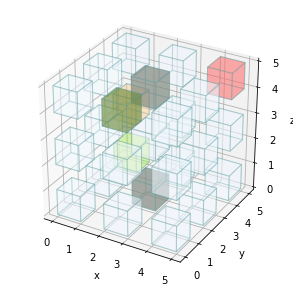

.....................Done!


In [10]:
# rendering the agent outputs and storing them into '.mp4' file.
agent_rendering(new_env_observation_samples)

In [11]:
from IPython.display import HTML
from base64 import b64encode
import os

# Input video path
save_path = "/content/videos/result.mp4"

# Compressed video path
compressed_path = "test_anim.mp4"

os.system(f"ffmpeg -i {save_path} -vcodec libx264 {compressed_path}")

# Show video
mp4 = open(compressed_path,'rb').read()
data_url = "data:video/mp4;base64," + b64encode(mp4).decode()
HTML("""
<video width=400 controls>
      <source src="%s" type="video/mp4">
</video>
""" % data_url)

In [8]:
# printing package versions for maintaining compatibility in future.
print(np.__version__)
print(matplotlib.__version__)

1.21.6
3.2.2
